### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\sivak\Downloads\demo_assessments.csv")
df.head()

,createdBy,contentID,completedAttempts,shuffleQuestions,numberOfQuestions,updatedOn,title,status,averageScore.float,averageScore.integer,averageScore.provided,__key__.namespace,__key__.app,__key__.path,__key__.kind,__key__.name,__key__.id,__error__,__has_error__
0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0.5,NaN,float,NaN,e~l-earnerapp,"""assessment"", ""WQIiM5iXz8tqUwyi6n1K""",assessment,WQIiM5iXz8tqUwyi6n1K,NaN,NaN,False
1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,integer,NaN,e~l-earnerapp,"""assessment"", ""e2qxi19gMDjRHzmJ0EuJ""",assessment,e2qxi19gMDjRHzmJ0EuJ,NaN,NaN,False
2,Awx74A23qIXlHCaDxE356ue1It92,bYghHiy3hisccOzjz12L,0,False,2.0,25/04/2022 14:25:38,My classroom,LIVE,NaN,0.0,integer,NaN,e~l-earnerapp,"""assessment"", ""bYghHiy3hisccOzjz12L""",assessment,bYghHiy3hisccOzjz12L,NaN,NaN,False
3,xk6ux2hFeUNIdID2LnQCigmZtrg2,lu4HDaUECwovmk1r9Zsa,0,True,1.0,01/03/2022 03:42:54,Main test2,LIVE,NaN,0.0,integer,NaN,e~l-earnerapp,"""assessment"", ""lu4HDaUECwovmk1r9Zsa""",assessment,lu4HDaUECwovmk1r9Zsa,NaN,NaN,False
4,EyIuFE6FMSSt6ILKSKvetz4i3kB3,T8yaianDtBlAaKB0DsJ0,1,True,5.0,07/12/2023 23:51:52,NaN,LIVE,NaN,1.0,integer,NaN,e~l-earnerapp,"""assessment"", ""T8yaianDtBlAaKB0DsJ0""",assessment,T8yaianDtBlAaKB0DsJ0,NaN,NaN,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   createdBy              19 non-null     object 
 1   contentID              19 non-null     object 
 2   completedAttempts      21 non-null     int64  
 3   shuffleQuestions       19 non-null     object 
 4   numberOfQuestions      19 non-null     float64
 5   updatedOn              19 non-null     object 
 6   title                  18 non-null     object 
 7   status                 19 non-null     object 
 8   averageScore.float     14 non-null     float64
 9   averageScore.integer   7 non-null      float64
 10  averageScore.provided  21 non-null     object 
 11  __key__.namespace      0 non-null      float64
 12  __key__.app            21 non-null     object 
 13  __key__.path           21 non-null     object 
 14  __key__.kind           21 non-null     object 
 15  __key__.

In [4]:
df = df.drop(columns=["createdBy","contentID","shuffleQuestions","updatedOn","averageScore.provided",
                 "__key__.app","__key__.path","__key__.name","__key__.kind","__key__.namespace","__key__.id",
                 "__error__","__has_error__"])

In [5]:
df['averageScore'] = df['averageScore.float'].combine_first(df['averageScore.integer'])

df = df.drop(columns=['averageScore.float', 'averageScore.integer'])

In [6]:
df['numberOfQuestions'].fillna(0, inplace=True)
df['numberOfQuestions'] = df['numberOfQuestions'].astype(int)

C:\Users\sivak\AppData\Local\Temp\ipykernel_12032\3628208393.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['numberOfQuestions'].fillna(0, inplace=True)


In [7]:
df['averageScore'] = df['averageScore'].round(2)

In [8]:
df

,completedAttempts,numberOfQuestions,title,status,averageScore
0,1,0,NaN,NaN,0.50
1,1,0,NaN,NaN,1.00
2,0,2,My classroom,LIVE,0.00
3,0,1,Main test2,LIVE,0.00
4,1,5,NaN,LIVE,1.00
5,6,5,Alphabets Lesson 2 (Upper and Lower Case),LIVE,0.83
6,9,6,Alphabets Lesson 1 (A-M),LIVE,0.76
7,13,5,Interpreting the weather,LIVE,0.68
8,20,5,Environmental Studies,LIVE,0.53
9,24,5,Basic Addition Part One,LIVE,0.85


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   completedAttempts  21 non-null     int64  
 1   numberOfQuestions  21 non-null     int32  
 2   title              18 non-null     object 
 3   status             19 non-null     object 
 4   averageScore       21 non-null     float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 888.0+ bytes


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
completedAttempts,21.0,29.000000,41.865260,0.0,1.00,13.00,49.00,179.0
numberOfQuestions,21.0,3.952381,2.132515,0.0,2.00,5.00,5.00,7.0
averageScore,21.0,0.560476,0.364630,0.0,0.26,0.68,0.83,1.0


In [11]:
df[['title', 'completedAttempts']].sort_values(by='completedAttempts', ascending=False).head(5)

,title,completedAttempts
17,Morning Greetings,179
16,Our solar system,80
15,Counting Numbers 10 - 20,55
14,Counting Numbers 20 - 30,51
13,Afternoon Greetings,49


In [12]:
df[['title', 'averageScore']].sort_values(by='averageScore', ascending=False).head(5)

,title,averageScore
4,NaN,1.00
1,NaN,1.00
15,Counting Numbers 10 - 20,0.92
11,Evening Greetings,0.92
9,Basic Addition Part One,0.85


In [13]:
df[df['averageScore'] <= 0.5]

,completedAttempts,numberOfQuestions,title,status,averageScore
0,1,0,NaN,NaN,0.50
2,0,2,My classroom,LIVE,0.00
3,0,1,Main test2,LIVE,0.00
16,80,4,Our solar system,LIVE,0.26
18,0,1,Test questions,DRAFT,0.00
19,0,1,SDSDSD DFDFDFDF DSFDFDF,DRAFT,0.00
20,0,6,The Boy and the North Wind,DRAFT,0.00


In [14]:
df[df['averageScore'] > 0.5]

,completedAttempts,numberOfQuestions,title,status,averageScore
1,1,0,NaN,NaN,1.00
4,1,5,NaN,LIVE,1.00
5,6,5,Alphabets Lesson 2 (Upper and Lower Case),LIVE,0.83
6,9,6,Alphabets Lesson 1 (A-M),LIVE,0.76
7,13,5,Interpreting the weather,LIVE,0.68
8,20,5,Environmental Studies,LIVE,0.53
9,24,5,Basic Addition Part One,LIVE,0.85
10,30,5,The Boy and the North Wind,LIVE,0.57
11,41,5,Evening Greetings,LIVE,0.92
12,49,7,Counting Numbers 1-10,LIVE,0.83


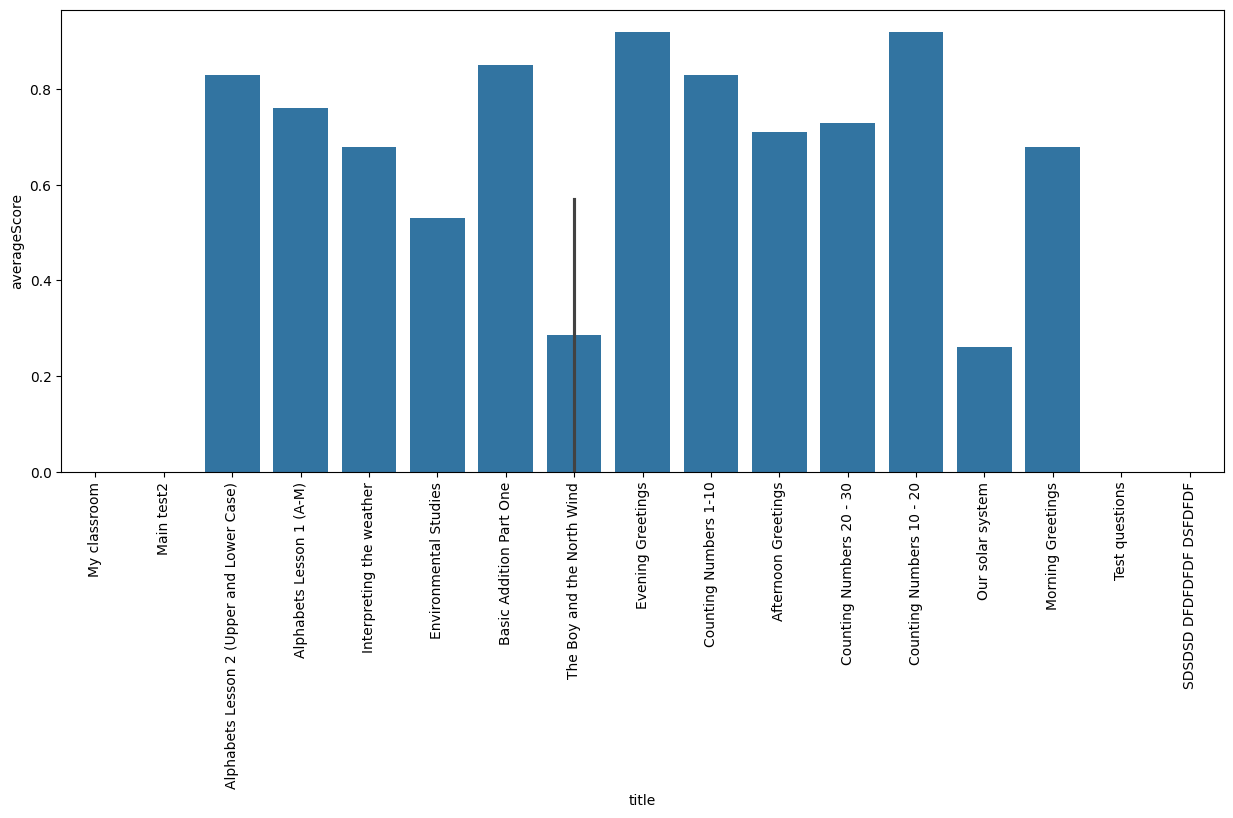

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(data=df, x = df['title'], y = df['averageScore'])
plt.xticks(rotation=90)
plt.show()

                   completedAttempts  numberOfQuestions  averageScore
completedAttempts           1.000000           0.366831      0.240611
numberOfQuestions           0.366831           1.000000      0.449503
averageScore                0.240611           0.449503      1.000000


<Axes: >

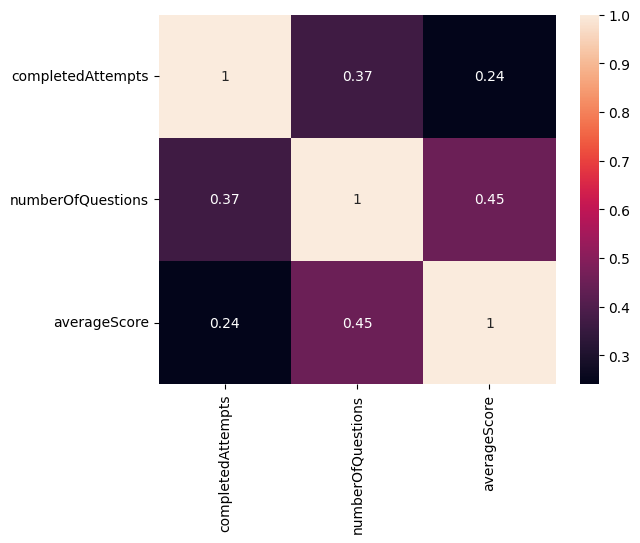

In [16]:
correlation_matrix = df[['completedAttempts', 'numberOfQuestions', 'averageScore']].corr()
print(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True)